## 1 Pokémon Visualizations (10 points)

For this section, download the Pokémon dataset from here: `https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/refs/heads/main/pokemon.csv`

If you like, you may experiment with different color schemes: see `https://matplotlib.org/stable/users/explain/colors/colormaps.html` for a listing of color maps available in Matplotlib. When plotting, you can indicate your chosen colors with the `cmap` argument. For example, if you want to use the "viridis" map, include `cmap="viridis"` into the plotting function.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/refs/heads/main/pokemon.csv')
df.head()

,attack,base_happiness,cap_rate,defense,exp_growth,height,hp,name,pokedex_number,speed,type_1,type_2,weight,generation,is_legendary
0,49,70,45,49,1059860,0.7,45,Bulbasaur,1,45,grass,poison,6.9,1,0
1,62,70,45,63,1059860,1.0,60,Ivysaur,2,60,grass,poison,13.0,1,0
2,100,70,45,123,1059860,2.0,80,Venusaur,3,80,grass,poison,100.0,1,0
3,52,70,45,43,1059860,0.6,39,Charmander,4,65,fire,NaN,8.5,1,0
4,64,70,45,58,1059860,1.1,58,Charmeleon,5,80,fire,NaN,19.0,1,0


### 1.1 Height across generations (10 points)

For this part, constrain the dataset to fire, water, and grass Pokémon (use the `type1` column).

1.  Produce a line plot of generation (x axis) and mean height per generation (y axis). Include a title and appropriate axis labels. Which generation has the tallest Pokemon? The shortest?
2.  In Part 1, you should see a large spike in height at generation 3. Revise your previous plot so it shows lines for fire, grass, and water Pokémon separately. Include a legend in addition to an appropriate title and axis labels. Which type is responsible for the unusually tall Pokémon in generation 3?



In [8]:
df_height_generation = df.groupby("generation", as_index=False)['height'].mean().round(3)
df_height_generation.head()

,generation,height
0,1,1.241
1,2,1.163
2,3,1.230
3,4,1.134
4,5,1.032


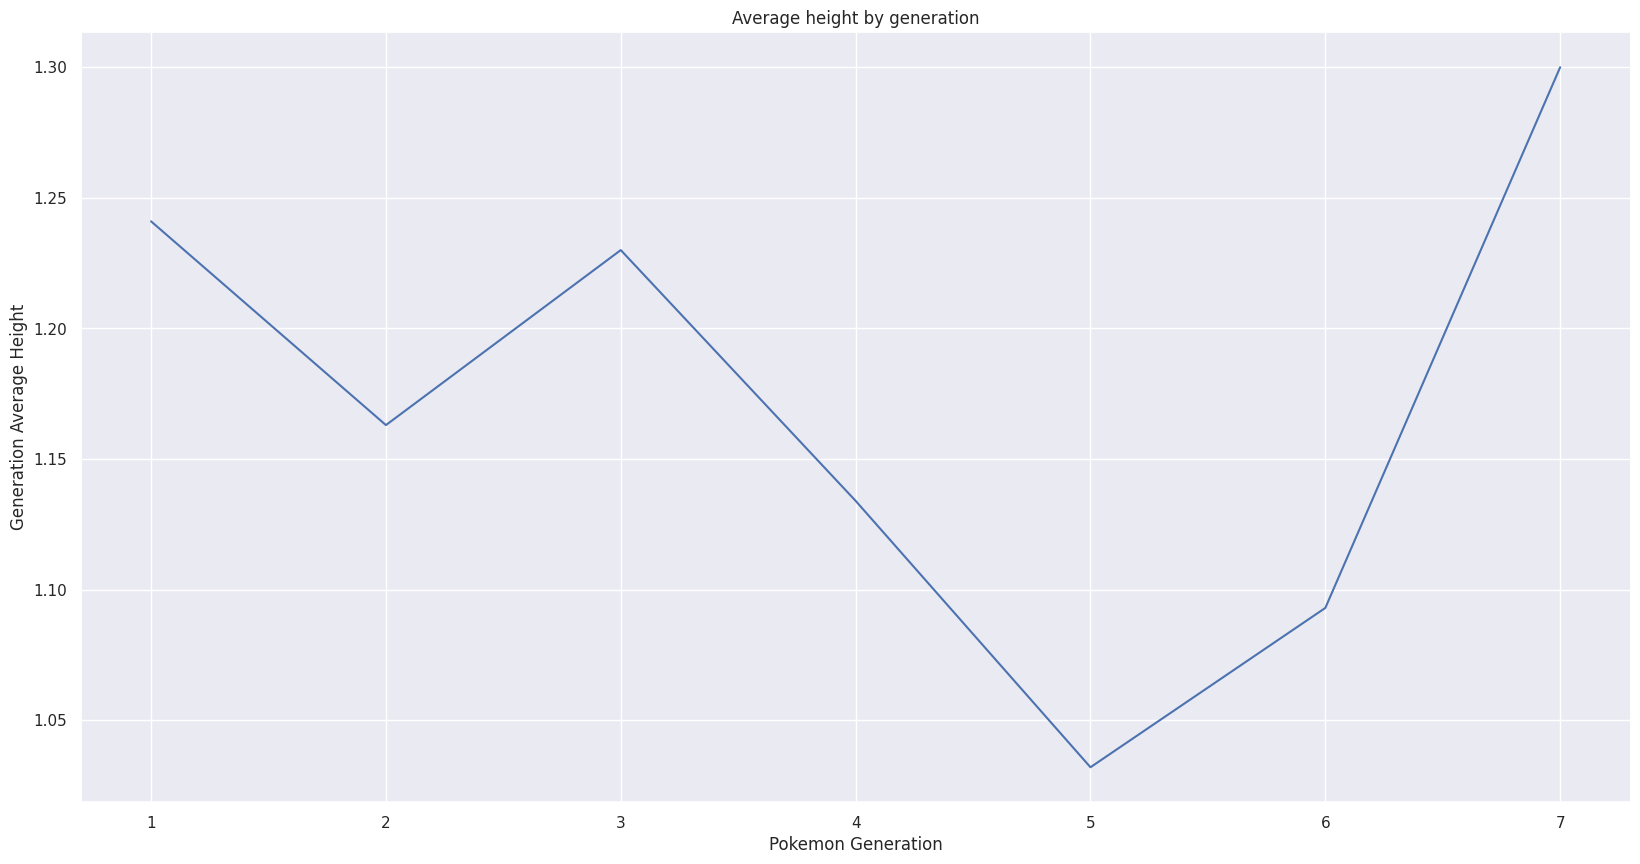

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize=(20,10))
sns.lineplot(data=df_height_generation, x='generation', y='height')

plt.xlabel("Pokemon Generation")
plt.ylabel("Generation Average Height")
plt.title("Average height by generation")

plt.show()

It seems the pokemon with the tallest is gen 7, while the pokemon with the shortest is gen 5.

In [16]:
df_height_trio = df.groupby(['generation', 'type_1'], as_index=False)['height'].mean()
df_height_trio = df_height_trio[(df_height_trio['type_1'] == 'fire') | (df_height_trio['type_1'] == 'grass') | (df_height_trio['type_1'] == 'water')]
df_height_trio.head()

,generation,type_1,height
5,1,fire,1.29
7,1,grass,1.00
14,1,water,1.30
20,2,fire,1.40
22,2,grass,0.80


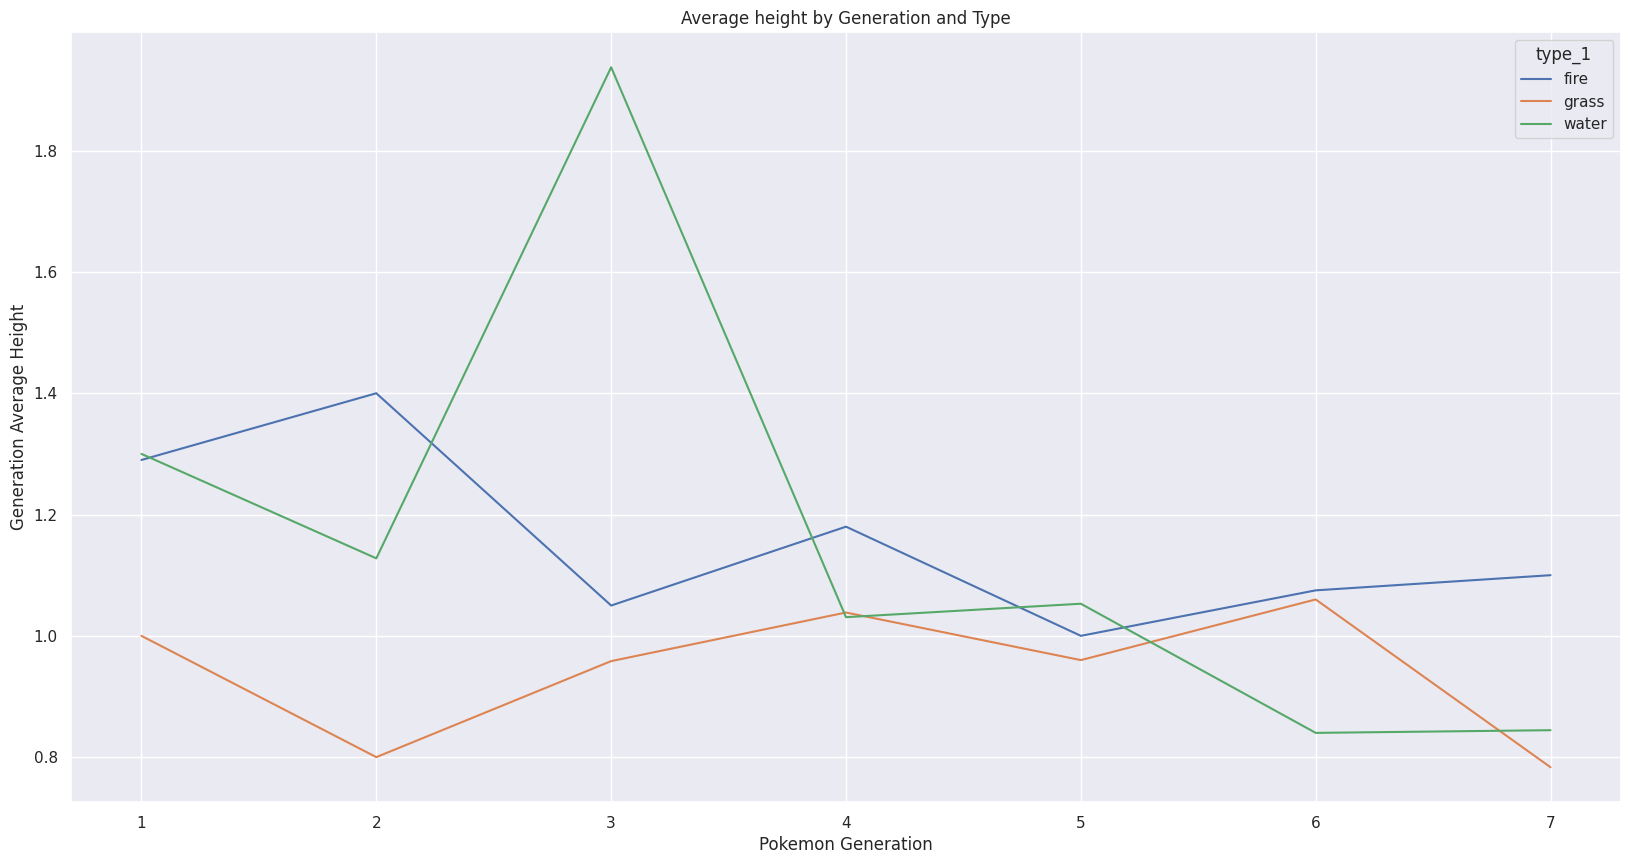

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_height_trio, x='generation', y='height', hue='type_1')

plt.xlabel("Pokemon Generation")
plt.ylabel("Generation Average Height")
plt.title("Average height by Generation and Type")

plt.show()


It seems for generation 3 the pokemon with the skewed height from fire, grass, and water is water.

## 2 Statistical Tools (20 points)

For this section, use the camera dataset: `https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/refs/heads/main/cameras.csv`.

You may constrain your analysis to the following columns: `Release date`, `Max resolution`, `Effective pixels`, `Normal focus range`, `Weight (inc. batteries)`, and `Dimensions`.

For each statistical test you perform, give the null and alternative hypothesis. Use a significance level of 5% when evaluating p values, and indicate whether you are justified in rejecting the null hypothesis.

1.  Create a correlation matrix of the dataset. Find 1 interesting strong correlation and 1 interesting weak correlation. Briefly discuss what each correlation means. As part of your discussion, indicate whether each correlation is significant.
2.  How much does max resolution increase each year? By how much?
3.  Split the dataset in two: one for cameras released on or after 2004, and one for cameras released before 2004. Is the mean camera weight different across these time periods? Is it significant?
4.  Using the before/after 2004 split, create a contingency table showing how many cameras were released for each brand (rows) in each time period (columns). Are there significant differences in brand distribution before and after 2004? Which brands released a very different number of cameras than expected?


In [28]:
df_cameras = pd.read_csv('https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/refs/heads/main/cameras.csv')

df_cameras.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand
0,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0,Canon
1,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0,Canon
2,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,Canon
3,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,Canon
4,Canon PowerShot A20,2001,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,Canon


In [22]:
restriction_columns = ['Release date', 'Max resolution', 'Effective pixels', 'Normal focus range', 'Weight (inc. batteries)', 'Dimensions']
df_cameras = df_cameras[restriction_columns]
df_cameras.head()

,Release date,Max resolution,Effective pixels,Normal focus range,Weight (inc. batteries),Dimensions
0,1997,640.0,0.0,70.0,320.0,93.0
1,1996,832.0,0.0,40.0,460.0,160.0
2,2001,1280.0,1.0,76.0,375.0,110.0
3,2002,1280.0,1.0,20.0,225.0,110.0
4,2001,1600.0,1.0,76.0,375.0,110.0


<Axes: >

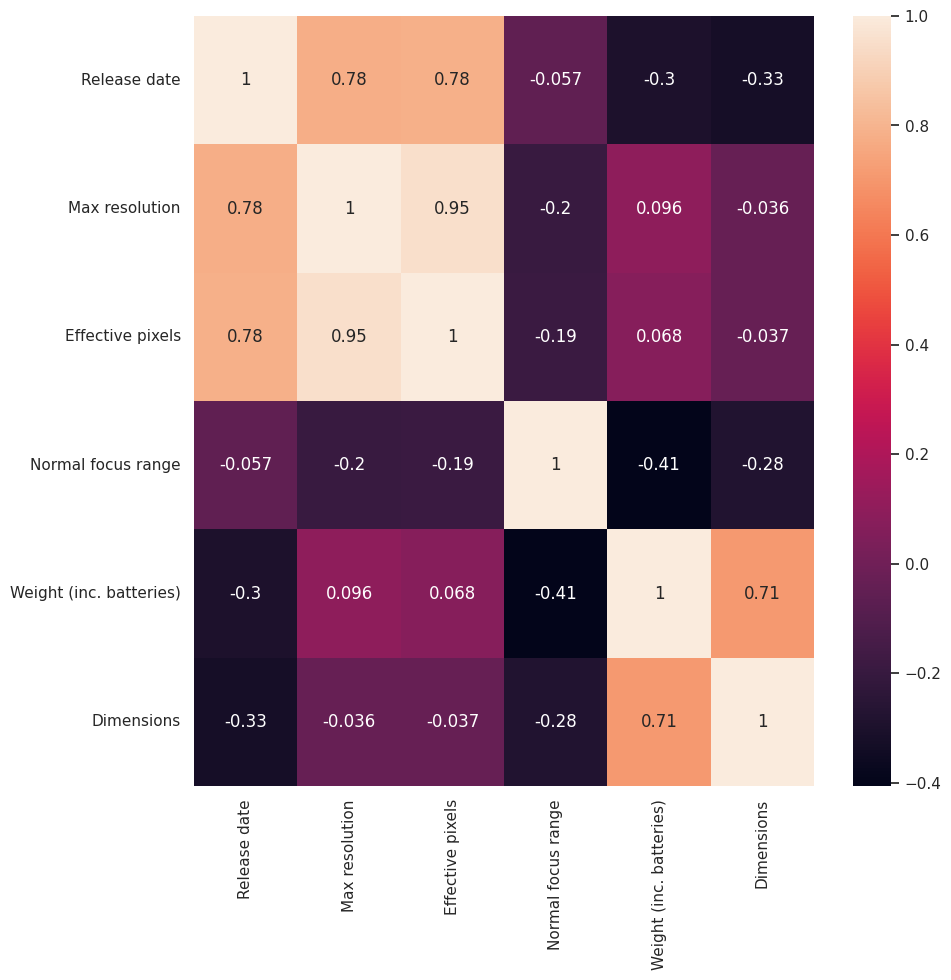

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cameras.corr(), annot=True)

In [44]:
from scipy import stats

In [45]:
stats.pearsonr(df_cameras['Effective pixels'], df_cameras['Max resolution'])

PearsonRResult(statistic=np.float64(0.9528890975221673), pvalue=np.float64(0.0))

In [46]:
stats.pearsonr(df_cameras['Effective pixels'], df_cameras['Weight (inc. batteries)'])

PearsonRResult(statistic=np.float64(0.0679107088217356), pvalue=np.float64(0.03491783831350693))

For this problem the strong and weak correlations respectiely are:
- ***Strong***

    It seems the strongest is effective pixels and max resolution, it seems as either goes up the other does to. Since the correlation is 95% it is very strong!

<br>

- ***Weak***

    It seems the weakest is pixels and weight, the correlation is just 6.8%, the correlation is definetly not statisically significant, neither has a major effective on another and is simlpy considence.

In [29]:
df_max_yearly = df_cameras.groupby(['Release date'], as_index=False)['Max resolution'].mean()
df_max_yearly.head()

,Release date,Max resolution
0,1994,1524.000000
1,1995,3060.000000
2,1996,784.000000
3,1997,859.428571
4,1998,1282.857143


<Axes: xlabel='Release date', ylabel='Max resolution'>

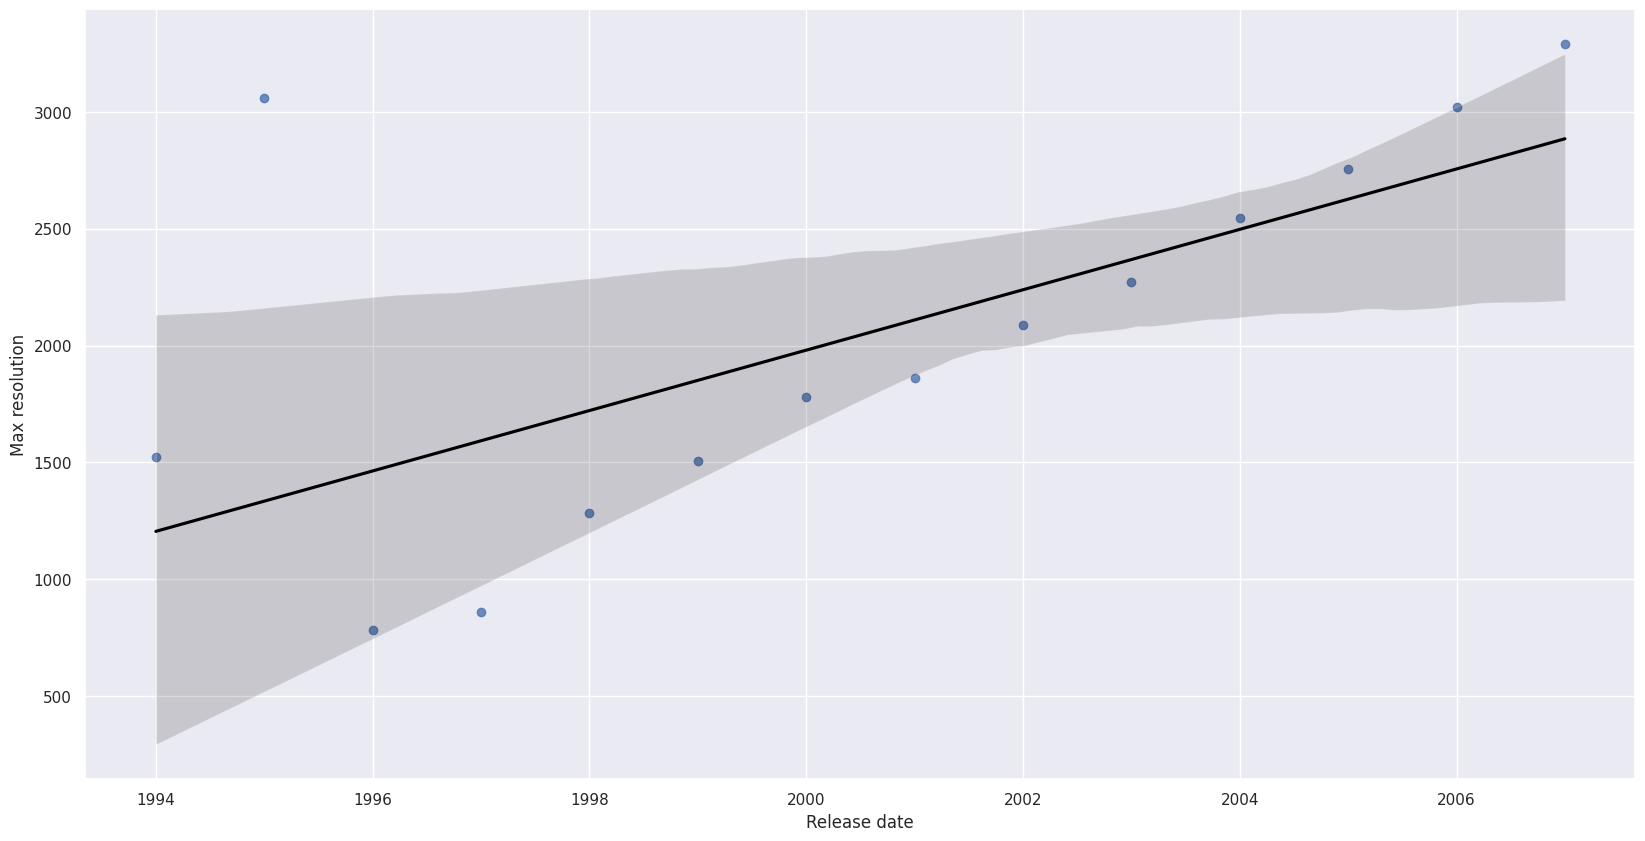

In [31]:
plt.figure(figsize=(20,10))
sns.regplot(data=df_max_yearly, x='Release date', y='Max resolution', line_kws={'color': 'black'})

In [32]:
linregress_results = stats.linregress(df_max_yearly['Release date'], df_max_yearly['Max resolution'])
linregress_results

LinregressResult(slope=np.float64(129.290102382717), intercept=np.float64(-256600.07053962146), rvalue=np.float64(0.6657118117376637), pvalue=np.float64(0.009355163144205678), stderr=np.float64(41.83587358913661), intercept_stderr=np.float64(83692.83503065282))

Max resolution increases by 129.290102382717 yearly as by the stats.

In [33]:
df_cameras_pre_2004 = df_cameras[df_cameras['Release date'] <= 2004]
df_cameras_post_2004 = df_cameras[df_cameras['Release date'] > 2004]

In [34]:
df_cameras_pre_2004.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand
0,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0,Canon
1,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0,Canon
2,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,Canon
3,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,Canon
4,Canon PowerShot A20,2001,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,Canon


In [35]:
df_cameras_post_2004.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand
11,Canon PowerShot A410,2005,2048.0,1600.0,3.0,41.0,131.0,0.0,1.0,16.0,195.0,103.0,139.0,Canon
12,Canon PowerShot A420,2006,2272.0,1600.0,4.0,39.0,125.0,47.0,1.0,16.0,200.0,103.0,139.0,Canon
13,Canon PowerShot A430,2006,2272.0,1600.0,4.0,39.0,156.0,47.0,1.0,16.0,210.0,103.0,139.0,Canon
14,Canon PowerShot A450,2007,2592.0,2048.0,5.0,38.0,122.0,47.0,1.0,16.0,215.0,106.0,139.0,Canon
15,Canon PowerShot A460,2007,2592.0,2048.0,5.0,38.0,152.0,47.0,1.0,16.0,215.0,106.0,139.0,Canon


In [37]:
pre_2004_weight = df_cameras_pre_2004.groupby('Release date', as_index=False)['Weight (inc. batteries)'].mean()
post_2004_weight = df_cameras_post_2004.groupby('Release date', as_index=False)['Weight (inc. batteries)'].mean()

In [41]:
print(df_cameras_pre_2004['Weight (inc. batteries)'].mean())
print(df_cameras_post_2004['Weight (inc. batteries)'].mean())

373.7627450980392
265.4879120879121


In [39]:
pre_2004_weight.head()

,Release date,Weight (inc. batteries)
0,1994,1700.000000
1,1995,1700.000000
2,1996,347.500000
3,1997,321.428571
4,1998,563.928571


In [40]:
post_2004_weight.head()

,Release date,Weight (inc. batteries)
0,2005,273.720280
1,2006,274.780000
2,2007,249.617284


It seems not only generally is the mean weight of the time periods greater in the pre 2004 era, but every year after is lower than any year in the pre time period but around the same weight.